In [2]:
import pandas as pd

# Create and process df for streamer

In [3]:
# import first dataframe (you can save the games df by running: df.to_csv(r'path/filename', index=False))
df = pd.read_csv('streamer_df')

In [4]:
# getting rows that contain ads out of the way
df = df[df["Time Streamed"].str.contains("ads")==False]
df.shape

(2450, 11)

In [7]:
# creating a new column that contains hours where we replace all hours with an emptry string and convert numbers in string to float
df['Time Streamed (in hours)'] = df['Time Streamed'].str.replace('hours','').apply(lambda x: float(x))


# do same thing for hours watched
df['Hours Watched'] = df['Hours Watched'].apply(lambda x: int(x))

# do it for every other columns
df['AVG Viewers'] = df['AVG Viewers'].apply(lambda x: int(x))
df['All Time Peak Viewers'] = df['All Time Peak Viewers'].apply(lambda x: int(x))
df['Total Followers'] = df['Total Followers'].apply(lambda x: int(x))
df['Total Views'] = df['Total Views'].apply(lambda x: int(x))
# df['Followers Gained'] = df['Followers Gained'].str.replace('+','').apply(lambda x: int(x))
# check if it worked
df.dtypes

# drop and rename columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Time Streamed'], axis=1,inplace=True)
df.rename(columns={'Unnamed: 2':'username'}, inplace=True)

# sort according to importance
df = df[['username', 'AVG Viewers', 'Time Streamed (in hours)', 'Hours Watched', 'Followers Gained', 'Total Followers', 'Total Views', 'All Time Peak Viewers']]

In [9]:
df.to_csv(r'/Users/home/code/Awesimous/StarFish/notebooks/streamer_df_clean', index=False)

In [6]:
df['AVG Viewers'].isna().sum()

0

/Users/home/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVG Viewers', ylabel='Density'>

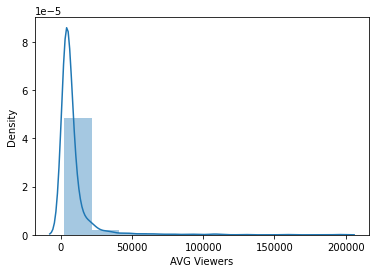

In [7]:
sns.distplot(df['AVG Viewers'], bins=10)

In [8]:
# try first visualization of correlation
df['Time Streamed (in hours)'].corr(df['Hours Watched'])

0.40060813134749224

In [9]:
df.corr()

,AVG Viewers,Time Streamed (in hours),Hours Watched,Followers Gained,Total Followers,Total Views,All Time Peak Viewers
AVG Viewers,1.000000,-0.004063,0.628819,0.522981,0.509105,0.282773,0.476700
Time Streamed (in hours),-0.004063,1.000000,0.400608,0.074139,0.144488,0.321864,0.076545
Hours Watched,0.628819,0.400608,1.000000,0.387128,0.508710,0.487839,0.393445
Followers Gained,0.522981,0.074139,0.387128,1.000000,0.427136,0.118600,0.295296
Total Followers,0.509105,0.144488,0.508710,0.427136,1.000000,0.498032,0.589309
Total Views,0.282773,0.321864,0.487839,0.118600,0.498032,1.000000,0.383347
All Time Peak Viewers,0.476700,0.076545,0.393445,0.295296,0.589309,0.383347,1.000000


# Robustscale all values to see what happens to correlation

In [10]:
X = df.drop(columns='username')

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
scaled_features = scaler.transform(X)

scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [16]:
# look at new correlation
scaled_features_df.corr()

,AVG Viewers,Time Streamed (in hours),Hours Watched,Followers Gained,Total Followers,Total Views,All Time Peak Viewers
AVG Viewers,1.000000,-0.004063,0.628819,0.522981,0.509105,0.282773,0.476700
Time Streamed (in hours),-0.004063,1.000000,0.400608,0.074139,0.144488,0.321864,0.076545
Hours Watched,0.628819,0.400608,1.000000,0.387128,0.508710,0.487839,0.393445
Followers Gained,0.522981,0.074139,0.387128,1.000000,0.427136,0.118600,0.295296
Total Followers,0.509105,0.144488,0.508710,0.427136,1.000000,0.498032,0.589309
Total Views,0.282773,0.321864,0.487839,0.118600,0.498032,1.000000,0.383347
All Time Peak Viewers,0.476700,0.076545,0.393445,0.295296,0.589309,0.383347,1.000000


# Trying out Twitter API